In [905]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/summeranalytics2020/train.csv
/kaggle/input/summeranalytics2020/Sample_submission.csv
/kaggle/input/summeranalytics2020/test.csv


In [906]:
# IMPORT THE DATA

data = pd.read_csv('../input/summeranalytics2020/train.csv', index_col='Id')
X_test = pd.read_csv('../input/summeranalytics2020/test.csv', index_col='Id')

In [907]:
# VIEWING THE DATA ONCE

data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour
Id,,,,,,,,,,,,,,,,,,,,,
1,30,0,Non-Travel,Research & Development,2,3,Medical,571,3,Female,...,3,0,12,2,11,7,6,7,4,1
2,36,0,Travel_Rarely,Research & Development,12,4,Life Sciences,1614,3,Female,...,3,2,7,2,3,2,1,1,2,1
3,55,1,Travel_Rarely,Sales,2,1,Medical,842,3,Male,...,3,0,12,3,9,7,7,3,5,1
4,39,0,Travel_Rarely,Research & Development,24,1,Life Sciences,2014,1,Male,...,3,0,18,2,7,7,1,7,4,1
5,37,0,Travel_Rarely,Research & Development,3,3,Other,689,3,Male,...,3,1,10,2,10,7,7,8,1,1


In [908]:
data.tail()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour
Id,,,,,,,,,,,,,,,,,,,,,
1624,42,1,Travel_Frequently,Research & Development,19,3,Medical,752,3,Male,...,3,0,7,2,2,2,2,2,3,1
1625,55,1,Travel_Rarely,Sales,2,1,Medical,842,3,Male,...,3,0,12,3,9,7,7,3,5,1
1626,25,1,Travel_Rarely,Sales,9,2,Life Sciences,1439,1,Male,...,3,0,6,2,3,2,2,2,5,1
1627,29,1,Travel_Rarely,Human Resources,13,3,Human Resources,1844,1,Male,...,3,3,4,3,2,2,2,0,5,1
1628,29,1,Travel_Rarely,Research & Development,18,1,Medical,315,3,Male,...,3,0,4,3,4,3,0,1,2,1


In [909]:
data.dtypes

Age                         int64
Attrition                   int64
BusinessTravel             object
Department                 object
DistanceFromHome            int64
Education                   int64
EducationField             object
EmployeeNumber              int64
EnvironmentSatisfaction     int64
Gender                     object
JobInvolvement              int64
JobRole                    object
JobSatisfaction             int64
MaritalStatus              object
MonthlyIncome               int64
NumCompaniesWorked          int64
OverTime                   object
PercentSalaryHike           int64
PerformanceRating           int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesLastYear       int64
YearsAtCompany              int64
YearsInCurrentRole          int64
YearsSinceLastPromotion     int64
YearsWithCurrManager        int64
CommunicationSkill          int64
Behaviour                   int64
dtype: object

In [910]:
# CHECKING THE NULL VALUES

data.isnull().sum()

Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeNumber             0
EnvironmentSatisfaction    0
Gender                     0
JobInvolvement             0
JobRole                    0
JobSatisfaction            0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
OverTime                   0
PercentSalaryHike          0
PerformanceRating          0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsInCurrentRole         0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
CommunicationSkill         0
Behaviour                  0
dtype: int64

In [911]:
# CHECKING THE MISSING/NAN VALUES

data.isna().sum()

Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeNumber             0
EnvironmentSatisfaction    0
Gender                     0
JobInvolvement             0
JobRole                    0
JobSatisfaction            0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
OverTime                   0
PercentSalaryHike          0
PerformanceRating          0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsInCurrentRole         0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
CommunicationSkill         0
Behaviour                  0
dtype: int64

In [912]:
data['Attrition'].value_counts()

0    843
1    785
Name: Attrition, dtype: int64

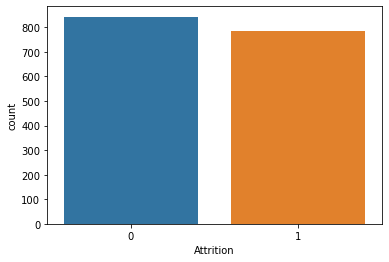

In [913]:
sns.countplot(data['Attrition'])
plt.show()

In [914]:
# Split the Numerical and Categorical columns 

numerical_col = data.select_dtypes(exclude=['object']).columns
categorical_col = data.select_dtypes(exclude=['int','float']).columns

In [915]:
for col in categorical_col:
    print(col, ':', data[col].unique())
    print(data[col].value_counts())
    print()

BusinessTravel : ['Non-Travel' 'Travel_Rarely' 'Travel_Frequently']
Travel_Rarely        1105
Travel_Frequently     403
Non-Travel            120
Name: BusinessTravel, dtype: int64

Department : ['Research & Development' 'Sales' 'Human Resources']
Research & Development    979
Sales                     568
Human Resources            81
Name: Department, dtype: int64

EducationField : ['Medical' 'Life Sciences' 'Other' 'Marketing' 'Technical Degree'
 'Human Resources']
Life Sciences       623
Medical             521
Marketing           197
Technical Degree    162
Other                85
Human Resources      40
Name: EducationField, dtype: int64

Gender : ['Female' 'Male']
Male      996
Female    632
Name: Gender, dtype: int64

JobRole : ['Laboratory Technician' 'Manufacturing Director' 'Sales Executive'
 'Research Scientist' 'Sales Representative' 'Healthcare Representative'
 'Research Director' 'Human Resources' 'Manager']
Sales Executive              365
Research Scientist           3

In [916]:
numerical_col

Index(['Age', 'Attrition', 'DistanceFromHome', 'Education', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'JobInvolvement', 'JobSatisfaction',
       'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'CommunicationSkill',
       'Behaviour'],
      dtype='object')

In [917]:
# Remove unneeded columns

data = data.drop(['EmployeeNumber','Behaviour'], axis=1)

In [918]:
data.corr()

,Age,Attrition,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill
Age,1.000000,-0.200596,0.020658,0.219237,0.001950,0.073185,0.037604,0.509210,0.312099,0.034546,0.002982,0.126257,0.675578,0.004789,0.355438,0.266728,0.222113,0.263792,0.019341
Attrition,-0.200596,1.000000,0.109224,-0.041390,-0.111746,-0.159710,-0.148012,-0.240479,0.034763,-0.012668,0.010202,-0.175496,-0.262922,-0.105663,-0.230061,-0.269408,-0.050379,-0.222752,0.103379
DistanceFromHome,0.020658,0.109224,1.000000,0.023945,-0.046390,0.016316,-0.097558,0.012521,-0.048131,0.103452,0.071457,0.029378,0.029289,-0.032038,-0.030392,-0.010607,0.004460,-0.004135,-0.036109
Education,0.219237,-0.041390,0.023945,1.000000,-0.065041,0.083673,-0.036143,0.119907,0.091690,0.013565,-0.036204,0.042585,0.175662,-0.043272,0.145911,0.076579,0.076430,0.121981,0.000223
EnvironmentSatisfaction,0.001950,-0.111746,-0.046390,-0.065041,1.000000,-0.000977,0.035033,-0.033990,-0.051681,-0.032655,-0.041427,-0.006479,-0.019005,0.020531,0.000685,0.008028,0.014325,0.002457,-0.011557
JobInvolvement,0.073185,-0.159710,0.016316,0.083673,-0.000977,1.000000,-0.005453,0.005859,0.012240,-0.042988,-0.063512,0.061673,0.037145,-0.027122,-0.008208,0.029460,0.006373,0.062552,0.052877
JobSatisfaction,0.037604,-0.148012,-0.097558,-0.036143,0.035033,-0.005453,1.000000,0.003255,-0.032738,-0.077425,-0.078554,0.024867,0.012892,-0.012757,0.023714,0.036065,0.004439,-0.006131,-0.051464
MonthlyIncome,0.509210,-0.240479,0.012521,0.119907,-0.033990,0.005859,0.003255,1.000000,0.169025,-0.017738,-0.037533,0.012281,0.759658,-0.020173,0.536715,0.418501,0.340080,0.401007,-0.060311
NumCompaniesWorked,0.312099,0.034763,-0.048131,0.091690,-0.051681,0.012240,-0.032738,0.169025,1.000000,0.015858,-0.015765,0.069008,0.226706,-0.043610,-0.099854,-0.081803,-0.046999,-0.116915,0.013289
PercentSalaryHike,0.034546,-0.012668,0.103452,0.013565,-0.032655,-0.042988,-0.077425,-0.017738,0.015858,1.000000,0.785024,0.025835,0.006266,0.008500,0.002299,0.029127,-0.036528,0.020399,0.004156


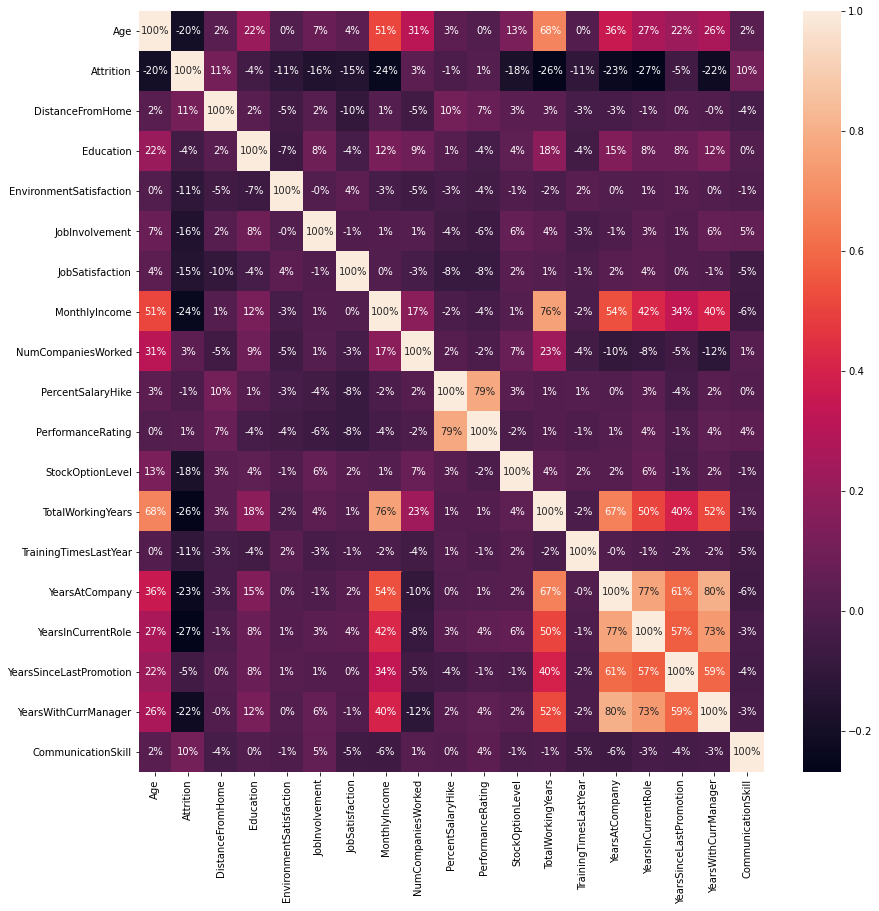

In [919]:
plt.figure(figsize=(14,14))
sns.heatmap(data.corr(), annot=True, fmt='.0%')
plt.show()

<Figure size 1008x1008 with 0 Axes>

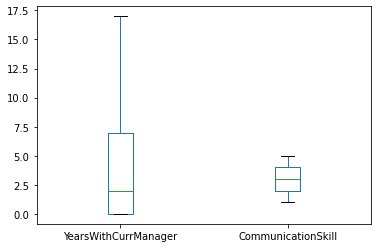

In [920]:
plt.figure(figsize=(14,14))
data[['YearsWithCurrManager', 'CommunicationSkill']].plot(kind='box')
plt.show()

In [921]:
# data['AgeNew'] = data['Age']
# data = data.drop('Age', axis=1)

In [922]:
categorical_col

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'OverTime'],
      dtype='object')

In [923]:
from sklearn.preprocessing import LabelEncoder

for col in ['EducationField', 'JobRole']:
    data[col] = LabelEncoder().fit_transform(data[col])

In [924]:
# ONE HOT ENCODING THE COLUMNS

overtime = pd.get_dummies(data['OverTime'])
bt = pd.get_dummies(data['BusinessTravel'])
gender = pd.get_dummies(data['Gender'])
status = pd.get_dummies(data['MaritalStatus'])
dept = pd.get_dummies(data['Department'])

In [925]:
numerical_col = data.select_dtypes(exclude=['object']).columns.drop('Attrition')
categorical_col = data.select_dtypes(exclude=['int','float']).columns

In [926]:
numerical_col

Index(['Age', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction',
       'JobInvolvement', 'JobSatisfaction', 'MonthlyIncome',
       'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'CommunicationSkill'],
      dtype='object')

In [927]:
# features = ['MonthlyIncome', 'Age', 'DistanceFromHome', 'PercentSalaryHike', 'TotalWorkingYears', 'JobSatisfaction', 
#             'EnvironmentSatisfaction', 'JobInvolvement', 'YearsAtCompany', 'NumCompaniesWorked', 'YearsInCurrentRole']


features = numerical_col

X = pd.concat([data[features],overtime, bt, gender, status, dept], axis=1)
# X = data.iloc[:,1:]
y = data.Attrition

# RandomForestClassifier

In [928]:
from sklearn.model_selection import train_test_split as tts
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

X_train,X_val,y_train,y_val = tts(X,y,test_size = 0.2,random_state = 1)

In [929]:
# from imblearn.over_sampling import SMOTE

# oversampler=SMOTE(random_state=0)
# smote_train, smote_target = oversampler.fit_sample(X_train,y_train)

In [930]:
randforestcla = RandomForestClassifier(n_estimators=200, random_state=3, max_depth=5)
randforestcla.fit(X_train,y_train)

predicted = randforestcla.predict(X_val)
test_cm = confusion_matrix(y_val, predicted)
print(test_cm)

test_acc = (test_cm[0,0] + test_cm[1,1]) / test_cm.sum()
print('Accuracy :', test_acc)

[[145  21]
 [ 32 128]]
Accuracy : 0.8374233128834356


In [931]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Since there is no preprocessing, we don't need a pipeline (used anyway as best practice!)
my_pipeline = make_pipeline(RandomForestClassifier(n_estimators=50))
cv_scores = cross_val_score(my_pipeline, X, y, cv=5, scoring='accuracy')

print("Cross-validation accuracy: %f" % cv_scores.mean())

Cross-validation accuracy: 0.973595


# AUC - ROC curve

In [932]:
auc = roc_auc_score(y_val, randforestcla.predict_proba(X_val).T[1])
print('AUC: %.3f' % auc)

ns_fpr, ns_tpr, thresholds1 = roc_curve(y_val, range(len(y_val)))
lr_fpr, lr_tpr, thresholds2 = roc_curve(y_val, randforestcla.predict_proba(X_val).T[1])

AUC: 0.924


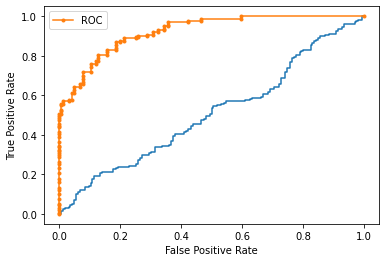

In [933]:
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='-')
plt.plot(lr_fpr, lr_tpr, marker='.', label='ROC')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# show the legend
plt.legend()

# show the plot
plt.show()

# test data

In [934]:
from sklearn.preprocessing import LabelEncoder

X_test = X_test.drop(['EmployeeNumber','Behaviour'], axis=1)

# ONE HOT ENCODING THE COLUMNS
ot = pd.get_dummies(X_test['OverTime'])
bt = pd.get_dummies(X_test['BusinessTravel'])
gend = pd.get_dummies(X_test['Gender'])
status = pd.get_dummies(X_test['MaritalStatus'])
dept = pd.get_dummies(X_test['Department'])

# X_test['AgeNew'] = X_test['Age']
# X_test = X_test.drop('Age', axis=1)

for col in ['EducationField', 'JobRole']:
    X_test[col] = LabelEncoder().fit_transform(X_test[col])

X_test_filter = pd.concat([X_test[features], ot, bt, gend, status, dept], axis=1)

out = randforestcla.predict_proba(X_test_filter).T[1]

In [935]:
# Store the submission csv file

submit = pd.DataFrame({'Id': range(1,len(X_test)+1), 'Attrition':out})
submit.to_csv('submission.csv', index=False)
print('submission file saved')

submission file saved


# XGBClassifier

In [936]:
import xgboost
from xgboost import plot_importance

model1 = xgboost.XGBClassifier(n_estimators=1000)
model1.fit(X_train, y_train, verbose=True)
y_pred= model1.predict(X_val)
test_cm = confusion_matrix(y_val, y_pred)
print("Confusion Matrix is %s"%(test_cm))

test_acc = (test_cm[0,0] + test_cm[1,1]) / test_cm.sum()
print('Accuracy :', test_acc)

Confusion Matrix is [[153  13]
 [  0 160]]
Accuracy : 0.9601226993865031


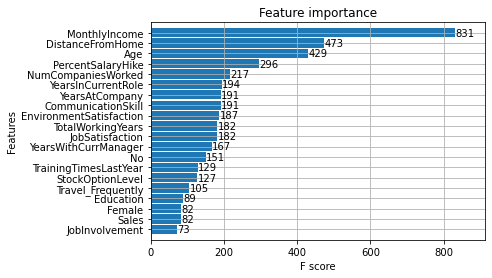

In [937]:
plot = plot_importance(model1, height=0.9, max_num_features=20)

In [938]:
# out1 = model1.predict_proba(X_test_filter).T[1]

# Decision Tree

In [939]:
from sklearn.tree import DecisionTreeClassifier

Treecla = DecisionTreeClassifier(criterion = "entropy", max_depth = 5, random_state=2)
Treecla.fit(X_train,y_train)

predicted = Treecla.predict(X_val)
test_cm = confusion_matrix(y_val, predicted)
print(test_cm)

test_acc = (test_cm[0,0] + test_cm[1,1]) / test_cm.sum()
print('Accuracy :', test_acc)

[[135  31]
 [ 36 124]]
Accuracy : 0.7944785276073619
